# Kristen Brandt, Oliver Graf, Estuardo Ureta

## Análisis exploratorio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from pandas_profiling import ProfileReport
import pandas_profiling as pp

In [12]:
import os
os.getcwd()

'/Users/kristenbrandt/Documents/Universidad/Data Science/Proyecto2'

Lo primero es cargar el training y test dataset para poderlas utilizar despues

In [13]:
train_df = pd.read_csv('10832_15122_bundle_archive/boneage-training-dataset.csv')
test_df = pd.read_csv('10832_15122_bundle_archive/boneage-test-dataset.csv')

Pandas profiling de el train dataset para poder entenderlo mejor

In [14]:
profile = ProfileReport(train_df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_widgets()

/usr/local/lib/python3.8/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


male y female

<AxesSubplot:xlabel='male', ylabel='count'>

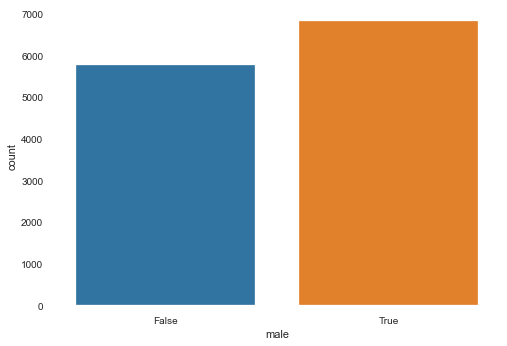

In [16]:
sb.countplot(x = train_df['male'])

In [33]:
train_df.loc[train_df['male'] ==True , 'gender'] = "male"

In [34]:
train_df.loc[train_df['male'] ==False , 'gender'] = "female"

In [39]:
male = train_df[train_df['gender'] == 'male']
female = train_df[train_df['gender'] == 'female']

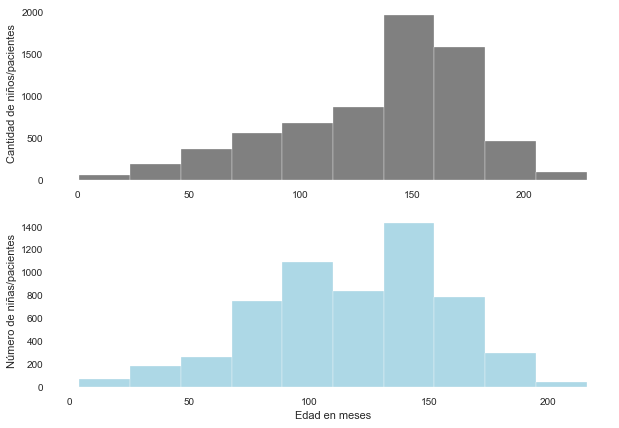

In [42]:
fig, ax = plt.subplots(2,1)
ax[0].hist(male['boneage'], color = 'grey')
ax[0].set_ylabel('Cantidad de niños/pacientes')
ax[1].hist(female['boneage'], color = 'lightblue')
ax[1].set_xlabel('Edad en meses')
ax[1].set_ylabel('Número de niñas/pacientes')
fig.set_size_inches((10,7))

In [43]:
profile = ProfileReport(male, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_widgets()

/usr/local/lib/python3.8/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [44]:
profile = ProfileReport(female, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_widgets()

/usr/local/lib/python3.8/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


### Imagenes

In [66]:
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

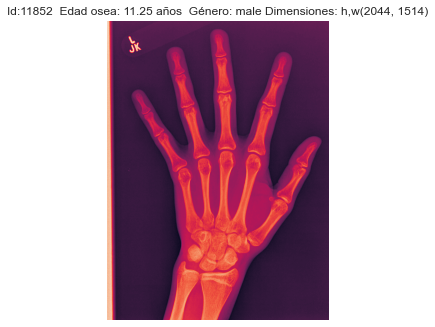

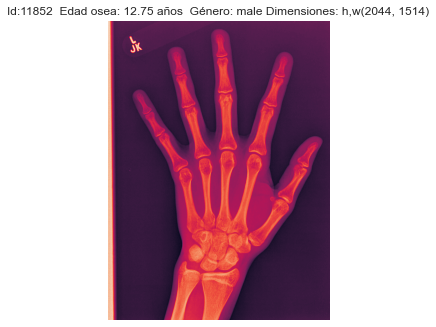

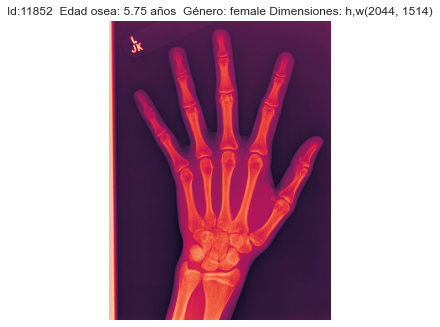

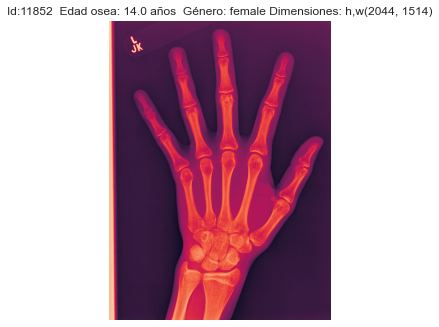

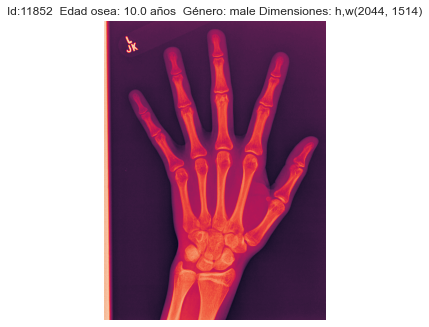

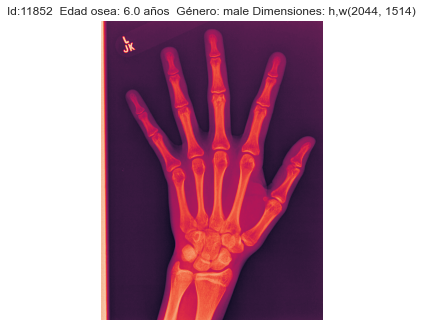

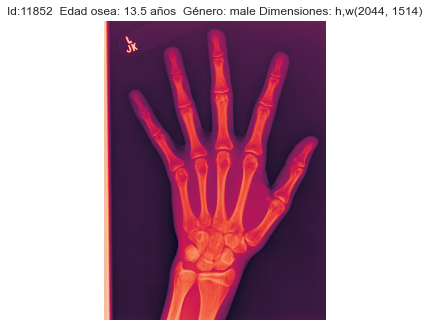

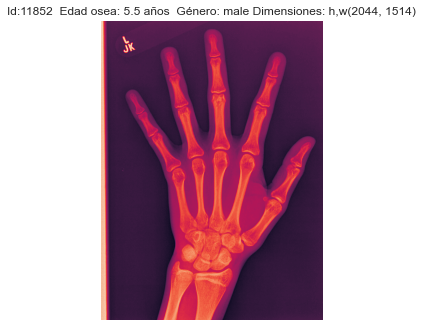

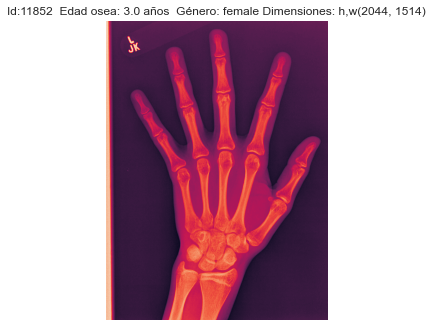

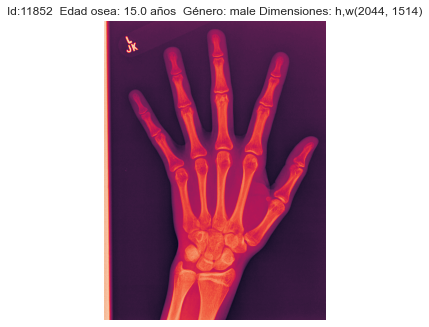

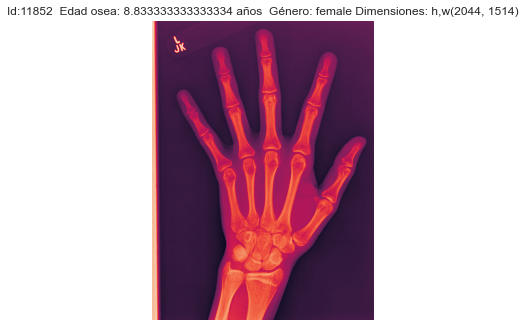

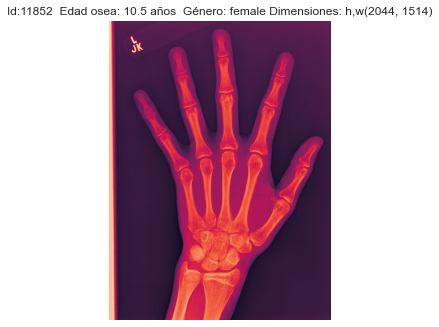

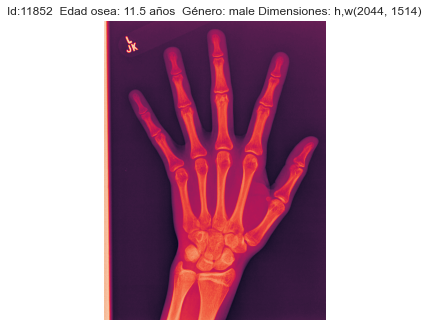

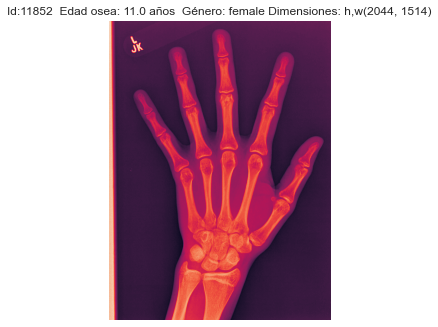

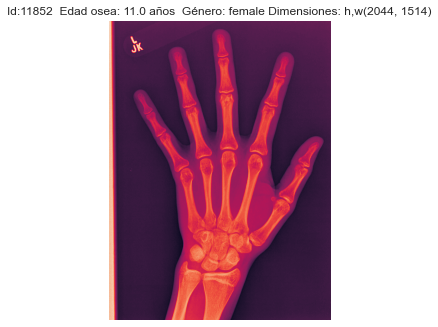

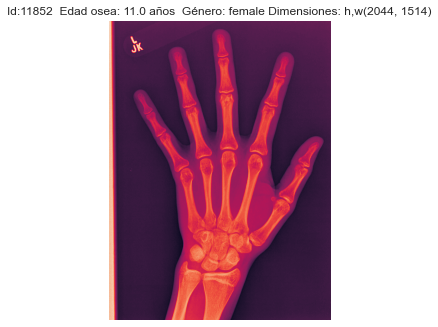

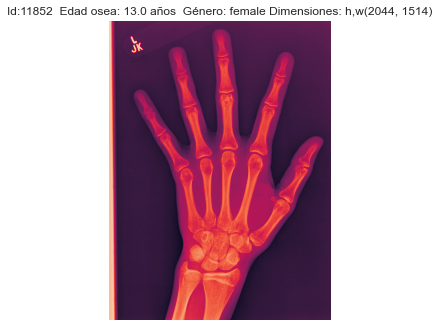

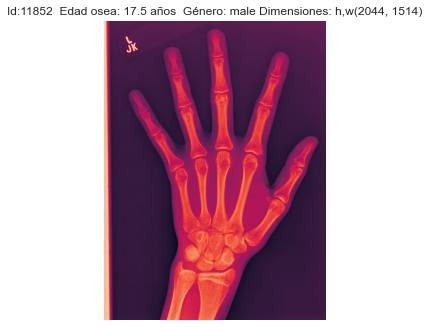

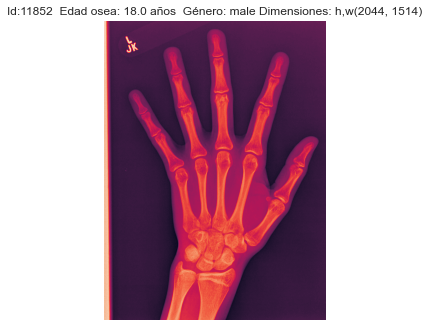

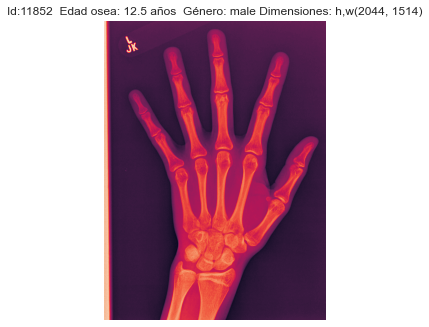

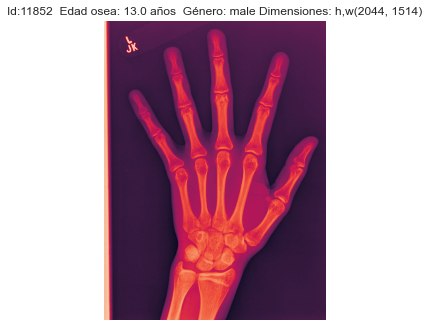

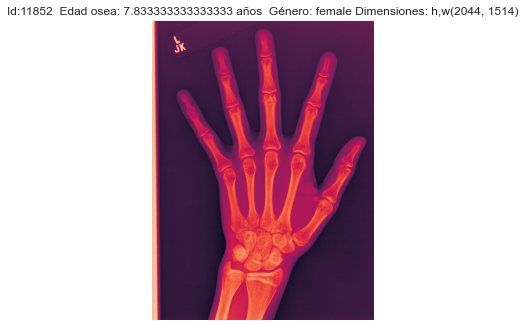

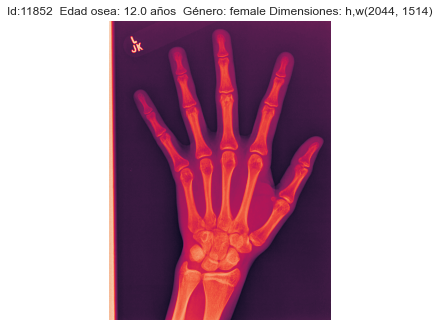

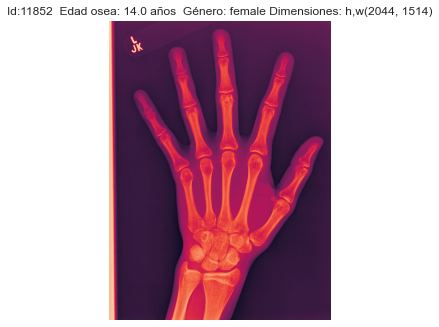

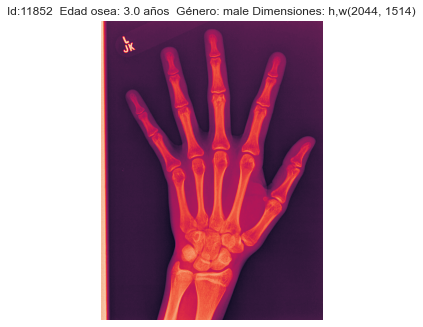

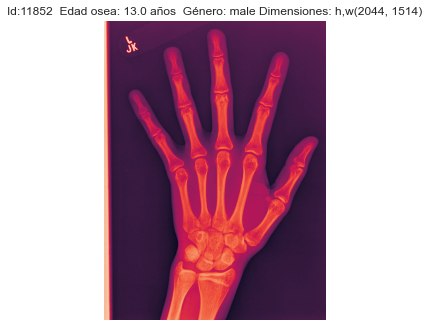

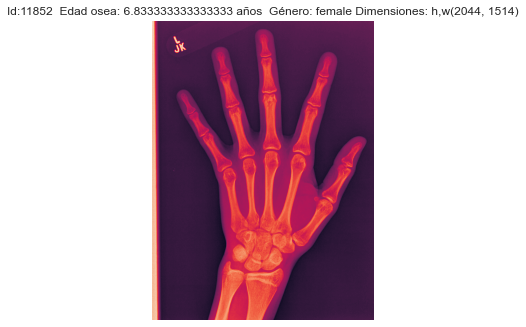

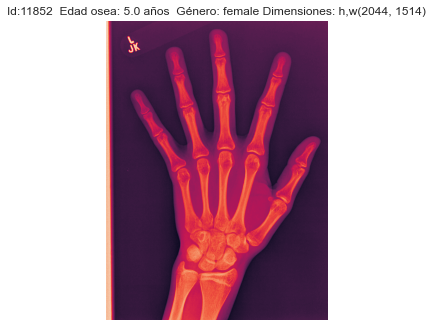

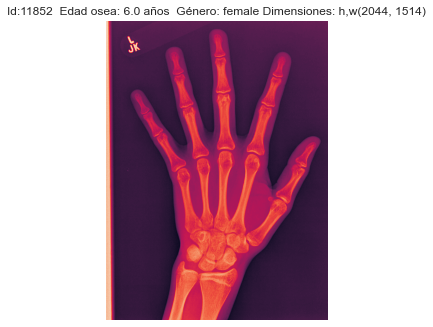

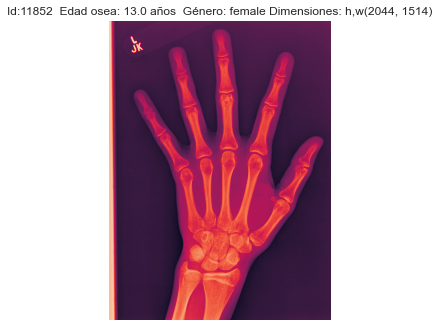

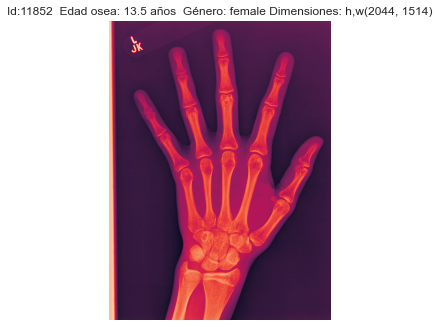

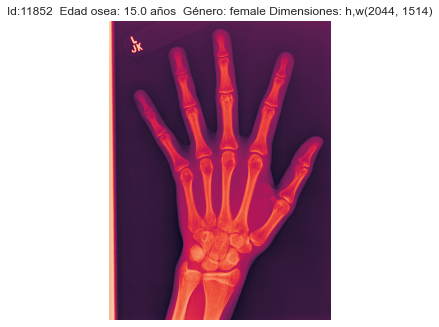

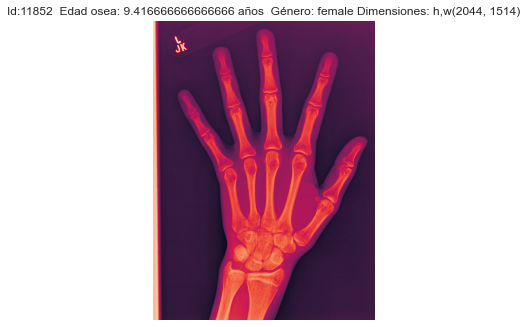

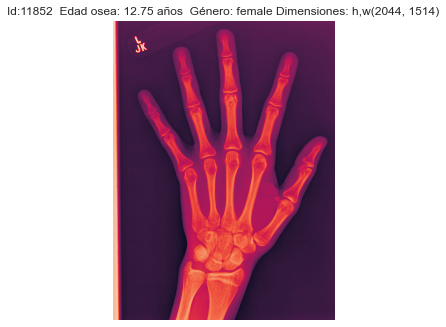

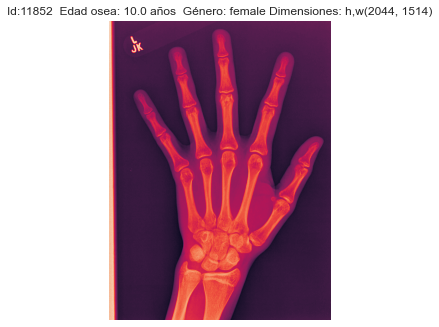

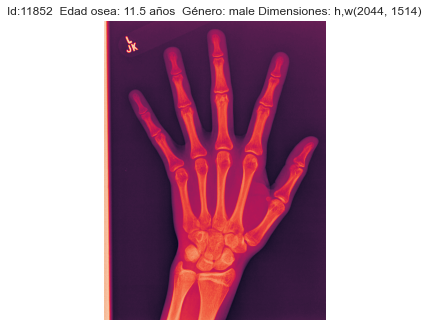

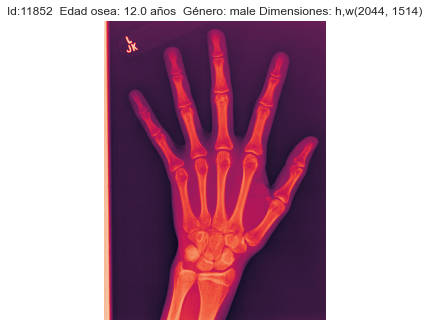

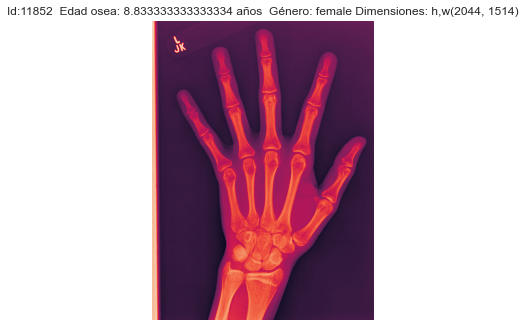

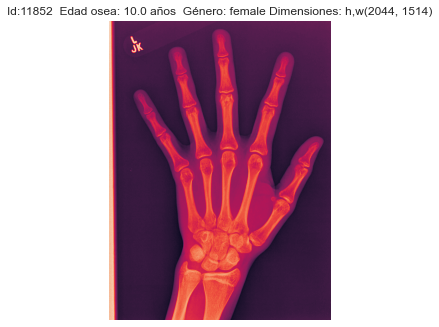

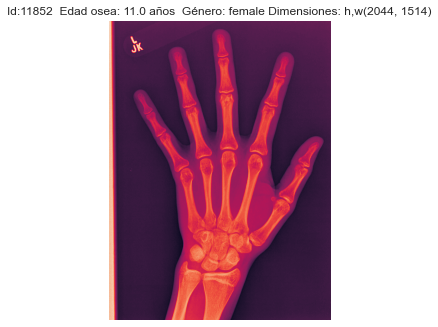

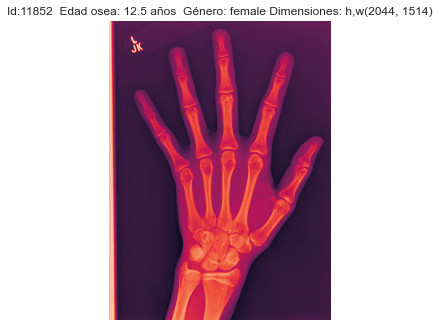

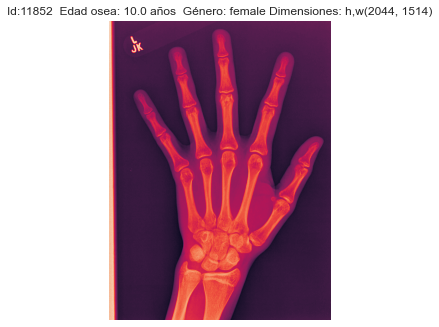

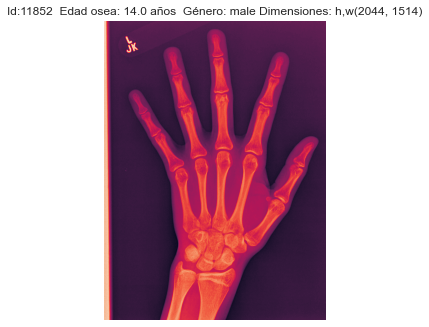

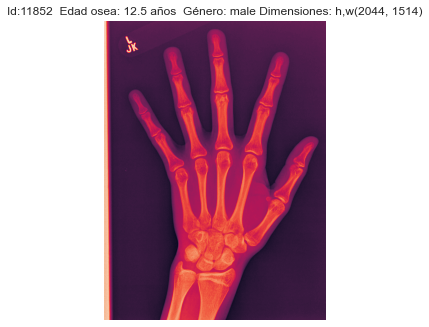

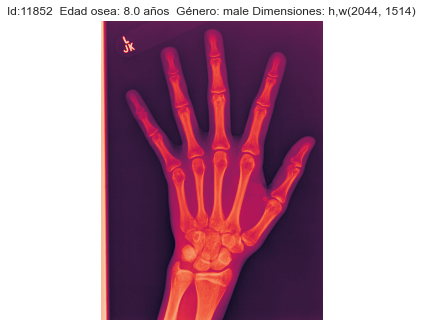

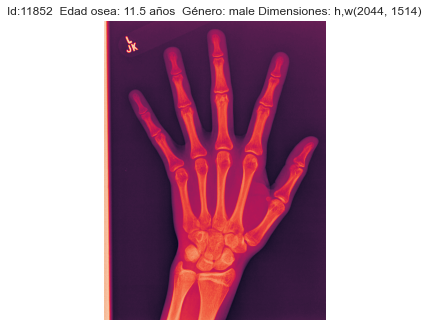

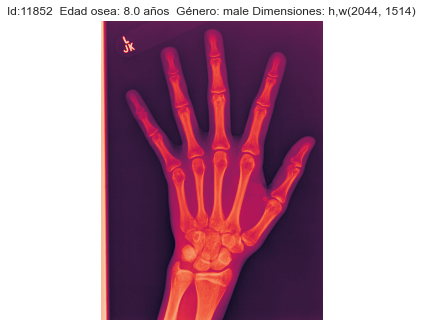

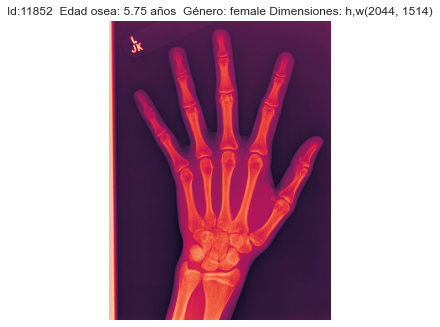

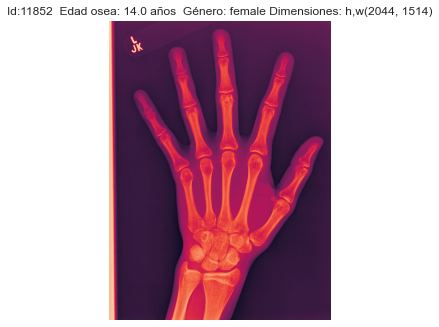

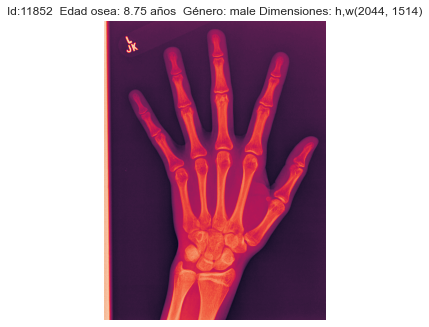

In [67]:
for ids, boneage, gender in train_df[['id','boneage','gender']].sample(50).values:
    #le pasamos el path
    img = mpimg.imread(f'/Users/kristenbrandt/Documents/Universidad/Data Science/Proyecto2/10832_15122_bundle_archive/boneage-training-dataset/boneage-training-dataset/{image_id}.png')
    plt.imshow(img)#plotteamos la imagen
    plt.title('Id:{}  Edad osea: {} años  Género: {} Dimensiones: h,w{}'.format(filename, boneage/12, gender, img.shape))
    plt.axis('off')
    plt.show()

In [83]:
train_df['path'] = f'/Users/kristenbrandt/Documents/Universidad/Data Science/Proyecto2/10832_15122_bundle_archive/boneage-training-dataset/boneage-training-dataset/{image_id}.png'

podemos notar que las imagenes tienen distintas dimensiones, eso es algo que hay que arreglar

## Preprocessing de las imagenes usando TensorFlow

In [2]:
#Extraido de: https://keras.io/api/preprocessing/image/
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  keras.applications.xception import preprocess_input 

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
#tamaño de imagen deseado
img_size = 256

train_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)
val_data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

NameError: name 'ImageDataGenerator' is not defined

In [3]:
train_generator = train_data_generator.flow_from_dataframe(
    dataframe = df_train,
    directory = '/Users/kristenbrandt/Documents/Universidad/Data Science/Proyecto2/10832_15122_bundle_archive/boneage-training-dataset/boneage-training-dataset',
    x_col= 'id',#columa x
    y_col= 'boneAgeZ',#columna y
    batch_size = 32,
    seed = 25, #reproducible
    shuffle = True,#random toma
    class_mode= 'other',#el tipo de clase de data, como no es normal, usamos other por ser imagen
    flip_vertical = True,#se hace flip
    color_mode = 'rgb',# las colocamos RGB
    target_size = (img_size, img_size))#colocamos el tamaño pre-establecido en la cell anterior

print("completado el training")
#Se empleo UNA forma para ajustar las imágenes. creando un DataImageGenerator con tensorflow.

NameError: name 'train_data_generator' is not defined

In [ ]:
#Se empleo 1forma para ajustar las imágenes. creando un DataImageGenerator con tensorflow.